# Example O-01: Ploting Optimization - context modifiers


This is a very small example of a way to plot the built-in `context_modifiers`


[ 1.  -0.1  4.   0.1]
[  1.  -20.    4.    0.1]
[  1.  -40.    4.    0.1]
[  1.  -60.    4.    0.1]
[  0.5 -20.    1.    0.1]
[  0.5 -20.    4.    0.1]


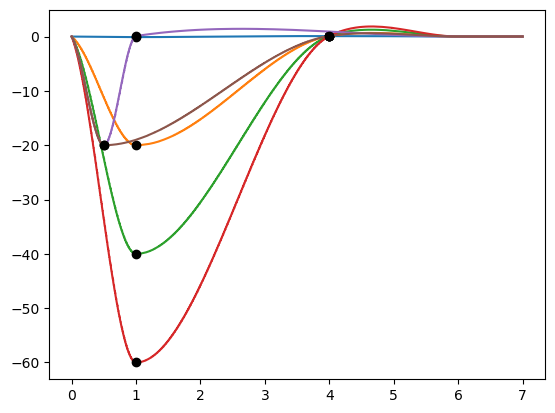

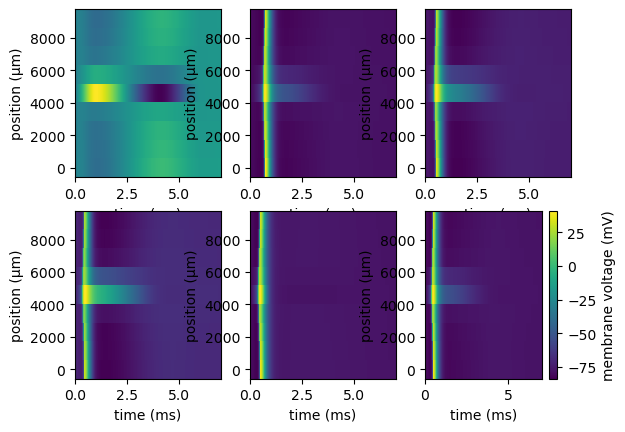

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../")
import nrv

# Generate a dummy static context
t_sim=7
l_ax = 10000
ax = nrv.myelinated(y=0, z=0, L=l_ax)
E1 = nrv.point_source_electrode(x=l_ax/2,y=0, z=100)
dummy_stim = nrv.stimulus()

extra_stim = nrv.stimulation("epineurium")
extra_stim.add_electrode(E1, dummy_stim)
ax.attach_extracellular_stimulation(extra_stim)
static_context = ax.save(extracel_context=True)


# Generate a dummy static context
kwrgs_interp = {
    "dt": 0.005,
    "amp_start": 0,
    "amp_stop": 0,
    "intertype": "Spline",
    "bounds": (0, 0),
    "fixed_order": False,
    "t_end": t_sim-1,
    }
test_stim_CM = nrv.stimulus_CM(interpolator=nrv.interpolate_Npts, intrep_kwargs=kwrgs_interp, t_sim=t_sim)


X = np.array([
    [1, -.1, 4, .1],
    [1, -20, 4, .1],
    [1, -40, 4, .1],
    [1, -60, 4, .1],
    [.5, -20, 1, .1],
    [.5, -20, 4, .1],
])


results = []
# simulate the axon
plt.figure(1)
plt.figure(2)
for i, x in enumerate(X):
    print(x)
    ax = test_stim_CM(x, static_context)
    results = ax(t_sim=t_sim)
    del ax


    plt.figure(1)
    results.plot_stim(0, t_stop=t_sim)
    plt.plot(x[::2], x[1::2], 'ok')
    plt.figure(2)
    plt.subplot(2,3,i+1)
    map = plt.pcolormesh(results['t'], results['x_rec'], results['V_mem'] ,shading='auto')
    plt.xlabel('time (ms)')
    plt.ylabel('position (µm)')


cbar = plt.colorbar(map)
cbar.set_label('membrane voltage (mV)')